### 1. An Ad- Agency analyzed a dataset of online ads and used a machine learning model to predict whether a user would click on an ad or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
from sklearn.model_selection import data_test_split
from sklearn.preprocessing import StandardScaler 
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Click_through_rate.csv')
data.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [9]:
data = data.drop(['id'],axis=1)

In [10]:
data.columns

Index(['hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 22 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   hour              int64 
 1   C1                int64 
 2   banner_pos        int64 
 3   site_id           object
 4   site_domain       object
 5   site_category     object
 6   app_id            object
 7   app_domain        object
 8   app_category      object
 9   device_id         object
 10  device_ip         object
 11  device_model      object
 12  device_type       int64 
 13  device_conn_type  int64 
 14  C14               int64 
 15  C15               int64 
 16  C16               int64 
 17  C17               int64 
 18  C18               int64 
 19  C19               int64 
 20  C20               int64 
 21  C21               int64 
dtypes: int64(13), object(9)
memory usage: 768.3+ MB


In [12]:
data.describe()

,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06,4.577464e+06
mean,1.410311e+07,1.004988e+03,2.110354e-01,1.009555e+00,3.748268e-01,2.171379e+04,3.202237e+02,5.954672e+01,2.469186e+03,1.304855e+00,1.851339e+02,5.347138e+04,9.195548e+01
std,5.694117e+00,9.305460e-01,4.724501e-01,4.278750e-01,8.963464e-01,3.765320e+03,2.868091e+01,4.649226e+01,4.756799e+02,1.305181e+00,2.622933e+02,4.994407e+04,8.394011e+01
min,1.410310e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.300000e+01
25%,1.410311e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.161100e+04,3.200000e+02,5.000000e+01,2.480000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,1.410311e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.313700e+04,3.200000e+02,5.000000e+01,2.664000e+03,1.000000e+00,3.900000e+01,1.000740e+05,5.100000e+01
75%,1.410312e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.408500e+04,3.200000e+02,5.000000e+01,2.761000e+03,3.000000e+00,2.950000e+02,1.001110e+05,2.210000e+02
max,1.410312e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.434900e+04,1.024000e+03,1.024000e+03,2.793000e+03,3.000000e+00,1.831000e+03,1.002480e+05,2.550000e+02


In [15]:
#segrigating numerical and categorical variables.

numerical = []
categorical = []

for col in (data.columns):
    if data[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


array([[<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'banner_pos'}>,
        <AxesSubplot:title={'center':'device_type'}>],
       [<AxesSubplot:title={'center':'device_conn_type'}>,
        <AxesSubplot:title={'center':'C14'}>,
        <AxesSubplot:title={'center':'C15'}>,
        <AxesSubplot:title={'center':'C16'}>],
       [<AxesSubplot:title={'center':'C17'}>,
        <AxesSubplot:title={'center':'C18'}>,
        <AxesSubplot:title={'center':'C19'}>,
        <AxesSubplot:title={'center':'C20'}>],
       [<AxesSubplot:title={'center':'C21'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

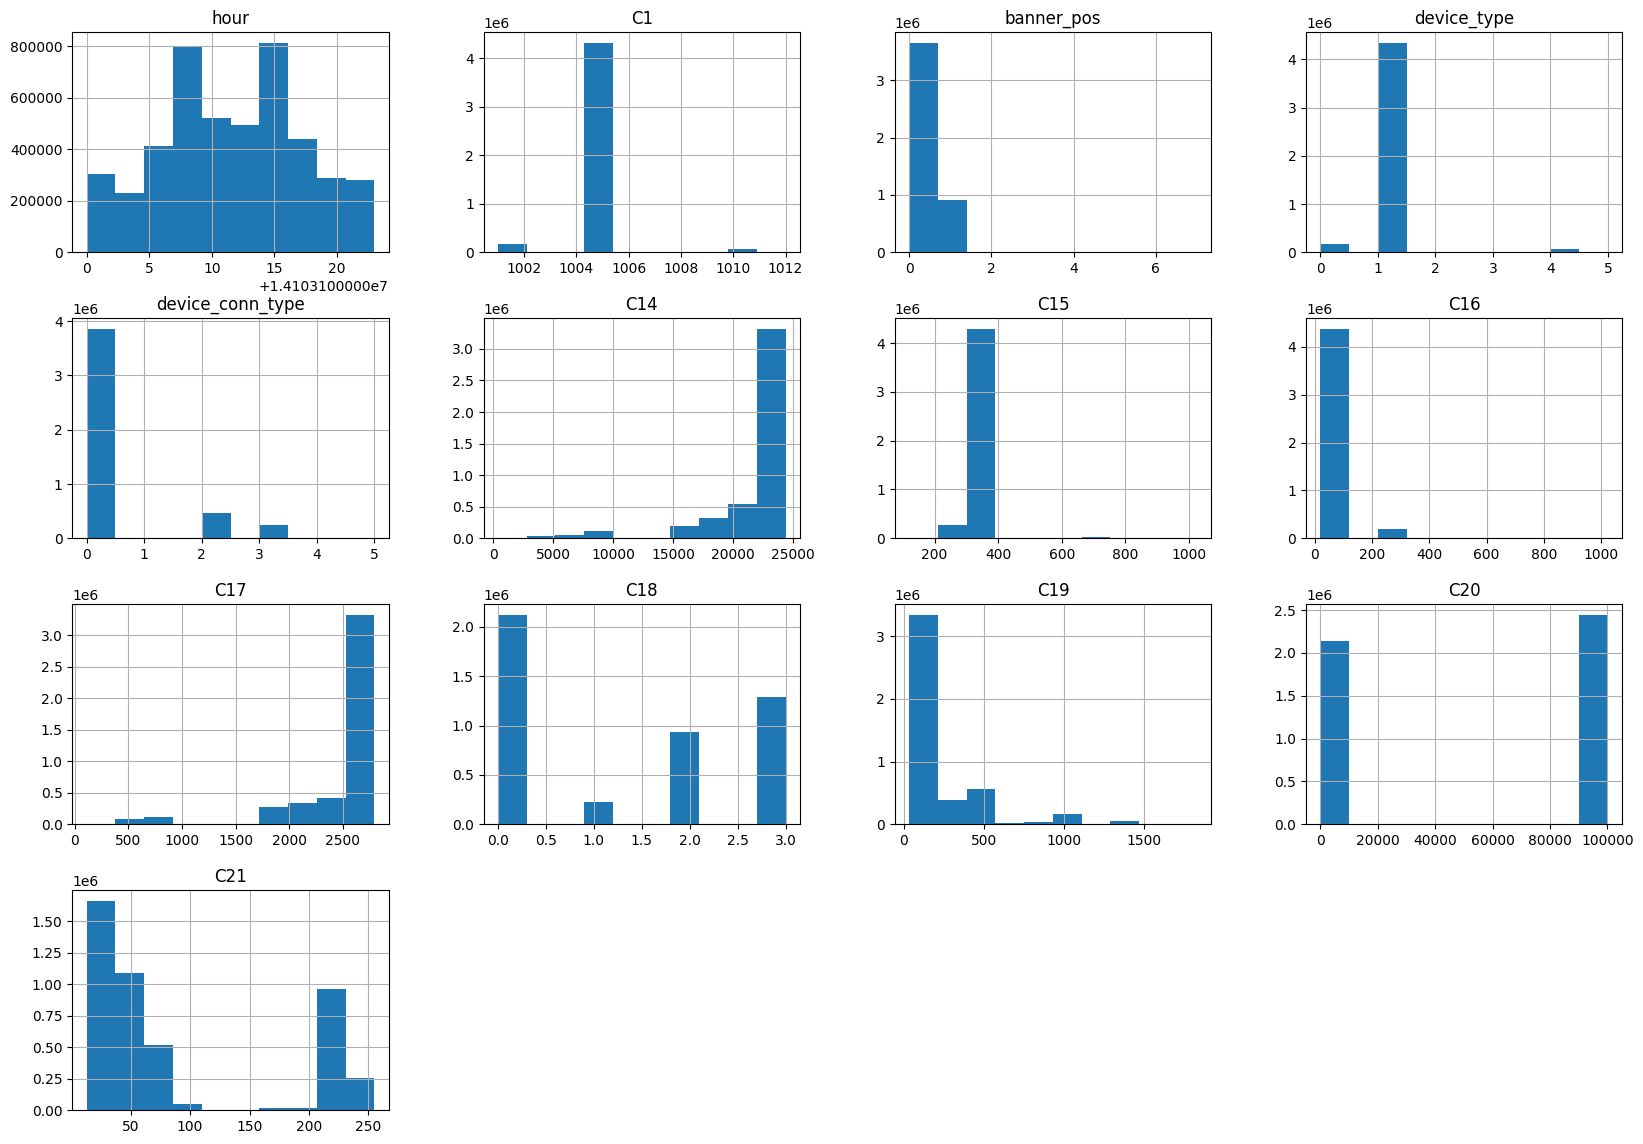

In [16]:
data[numerical].hist(figsize=(20,14))

In [17]:
# Cap the outliers of remove records where these column values are above 98 percentile
import numpy as np
Outlier_Col = ['C15', 'C16', 'C19']
for col in Outlier_Col:
    percentiles = data[col].quantile(0.98)
    if data[col].quantile(0.98) < 0.5 * data[col].max():
        data[col][data[col] >= percentiles] = percentiles
        print( col, np.percentile(data[col],98),data[col].quantile(0.98) )

C15 320.0 320.0
C16 250.0 250.0


Text(0.5, 1.05, 'Pearson correlation of Features')

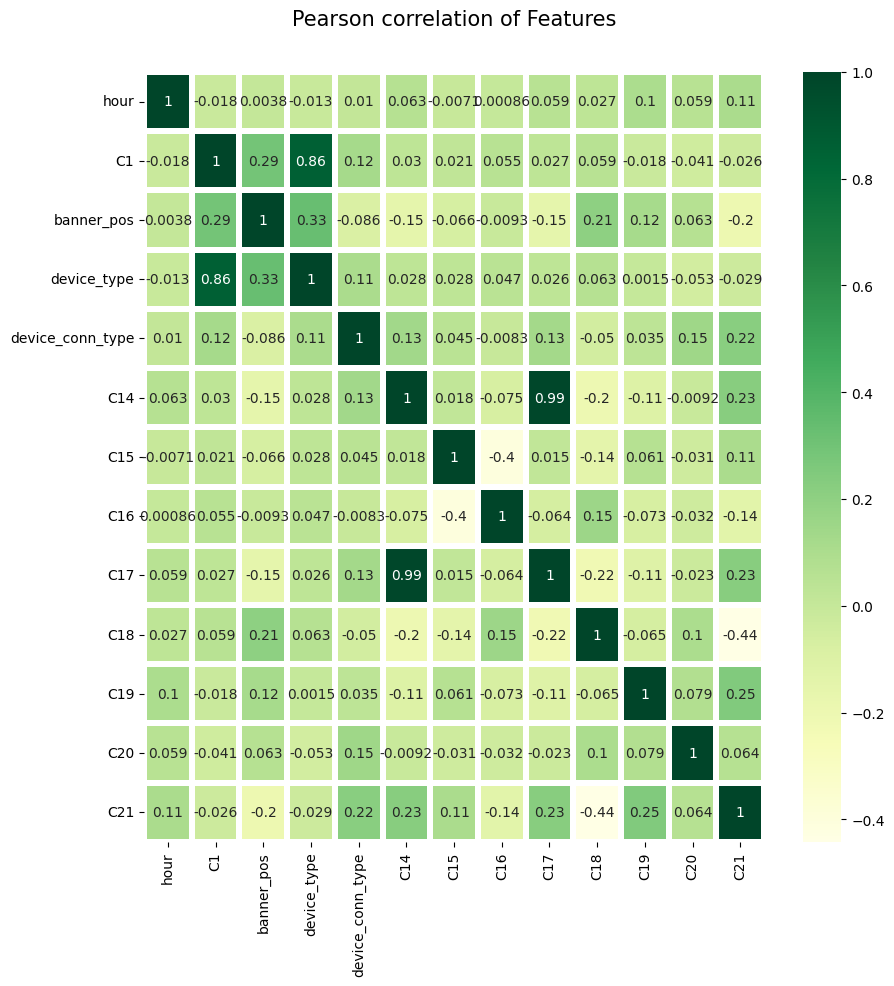

In [18]:
#Pearson correlation table to find the relationship with output with all input features. 

corr = data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

In [19]:
data.drop(['C20','C14'], axis=1, inplace=True)
data.columns

Index(['hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C15', 'C16', 'C17',
       'C18', 'C19', 'C21'],
      dtype='object')

In [21]:
data.hour.unique()

array([14103100, 14103101, 14103102, 14103103, 14103104, 14103105,
       14103106, 14103107, 14103108, 14103109, 14103110, 14103111,
       14103112, 14103113, 14103114, 14103115, 14103116, 14103117,
       14103118, 14103119, 14103120, 14103121, 14103122, 14103123],
      dtype=int64)